In [1]:
from qutip import *
import matplotlib.pyplot as plt
import numpy as np

En este Notebook queremos estudiar la dinamica de un sistema cuantico simple de dos niveles de energía (ver imagen), con el objetivo de encontrar la ergotropía en el estado final cuando  $\epsilon \neq 0$. 

<img src='DQD.png'>

La imagen muestra el sistema: un doble punto cuantico acoplado a dos reserverios electronicos, luego el problema a tratar estara en el regimen nanoscopico y se apunta que la interaccion entre los reservorios y el sistema cuantico es debil por lo cual el problema es modelado por la ecuació de Lindbal, ademas de imponer aproximaciones como la de banda ancha para permitir unidireccionalidad ademas tambien se impone bloqueo fuerte de Coulomb para imponer que como maximo un solo electron este en el sistema.

Es importante tener en cuenta que buscaremos la maxima ergotropia del sistema cuando este evoluciona a alguna coordenada del continuo valor que tiene el vector estacionario ().  

Primero podemos empezar con represtar las matrices de pauli 
$$
\text{$\sigma $x}=\left(
\begin{array}{cc}
 0 & 1 \\
 1 & 0 \\
\end{array}
\right)
$$
$$\text{$\sigma $y}=\left(
\begin{array}{cc}
 0 & -i \\
 i & 0 \\
\end{array}
\right)
$$
$$
\text{$\sigma $z}=\left(
\begin{array}{cc}
 1 & 0 \\
 0 & -1 \\
\end{array}
\right)
$$
y los valores externos entre los estados del sistema en su forma matricial
$$
\text{$\sigma $R}=\left(
\begin{array}{ccc}
 0 & 0 & 1 \\
 0 & 0 & 0 \\
 0 & 0 & 0 \\
\end{array}
\right)
$$
$$
\text{$\sigma $L}=\left(
\begin{array}{ccc}
 0 & 0 & 0 \\
 1 & 0 & 0 \\
 0 & 0 & 0 \\
\end{array}
\right)
$$

In [2]:
#G,L,R son los estados en los que puede estar el electron 
G = 0
L = 1
R = 2
#Las matrices de pauli (sx,sy,sz) son construidas en la base de ocupación (L,R) 
sz = projection(3, L, L) - projection(3, R, R) 
sx = projection(3, L, R) + projection(3, R, L)
sy = -projection(3, L, R)*1j + projection(3, R, L)*1j 
#Construimos los productos exteriores de los estados, para la construcción de los operadores de colapso sL=|L><0|, sR=|0><R|
sL = projection(3, L, G) 
sR = projection(3, G, R) 

Definimos los valores de las tasas de frecuencia $\Gamma_R$, $\Gamma_L$, la constante de acoplamiento entre los niveles $T_c$ estas constantes son producto del tunelamiento que hacen los electrones para pasar de izquierda a derecha a través de barreras de potenciales impuestos en la realización física del sistema y $\delta$ es llamada la desintonía entre los niveles de energía (detuning).

In [3]:
#Definimos los parametros del sistema
gammaR = 0.1 
gammaL = 0.1 
tc = 0.1 
nth = 0.00001 
delta = 1 #(desintonía) 

Los operadores colapso o de Lindblad (el estado colapsa de uno a otro y así es como hay transporte) se definen en función de los estados del sistema en la base de ocupación multiplicado por la raíz de los operadores de colapso, sea cual sea el caso (esta forma de operadores de colapso, se observan directamente de la derivación microscópica de la ecuación de Linblad):  
$$
 \hat{c}_{1}=\sqrt{\Gamma_{L}}|{L}\rangle\langle{0}|
$$

$$
\hat{c}_{2}=\sqrt{\Gamma_{R}}|{0}\rangle\langle{R}|
$$

$$
\hat{c}_{1}^{\dagger}=\sqrt{\Gamma_{L}}|{0}\rangle\langle{L}|
$$

$$
\hat{c}_{2}^{\dagger}=\sqrt{\Gamma_{R}}|{R}\rangle\langle{0}|
$$
Estos operadores son construcciones necesarias para describir la evolución del sistema mediante la ecuación de Lindblad.

In [4]:
#operadores colapso (escalera), operadores c1,c2,c1(daga),c2(daga)
c_ops = [np.sqrt(gammaL * (1 - nth)) * sL,
         np.sqrt(gammaL * (nth)) * sL.dag(),
         np.sqrt(gammaR * (nth)) * sR.dag(),
         np.sqrt(gammaR * (1 - nth)) * sR,
         ]

Consideramos el hamiltiano de dos niveles que describe el doble punto cuántico acoplado, siendo $\sigma_{z},\sigma_{x}$ las matrices de Pauli en la base de ocupación:
$$
\hat{H}=\frac{1}{2}\epsilon \sigma_{z}+T_{c}\sigma_{x}
$$

In [5]:
H = (delta/2 * sz + tc * sx) #Hamiltoniano del sistema
psi0 = (1.0*basis(3,0)+0.0*basis(3,2)).unit() #estado inicial de la evolución
e_ops = [sx, sy, sz]# lista e_ops de las matrices de pauli 

Gracias a Qutip la ecuación de Lindblad se puede definir mediante la función mesolve, y con los objetos cuánticos definidos atrás podemos solucionar la dinámica del sistema: 
$$
\dot{\rho}=-i[\hat{H},\hat{\rho}] + \textit{D}[\hat{c_{2}}]\hat{\rho}
           + \textit{D}[\hat{c_{1}}]\hat{\rho}
$$

In [6]:
tlist = np.linspace(0,100,1000)
result = mesolve(H, psi0, tlist, c_ops, e_ops) # Solucionamos la dinámica con mesolve (ecuación de Lindblad)
A,B,C=result.expect[0],result.expect[1],result.expect[2] #Obtenemos los valores esperados de sx,sy,sz
A

array([0.00000000e+00, 3.32396284e-06, 2.64203417e-05, 8.85011830e-05,
       2.07981695e-04, 4.02305245e-04, 6.87773483e-04, 1.07938867e-03,
       1.59071294e-03, 2.23374164e-03, 3.01880199e-03, 3.95446199e-03,
       5.04745786e-03, 6.30264316e-03, 7.72296811e-03, 9.30946054e-03,
       1.10612356e-02, 1.29755324e-02, 1.50477622e-02, 1.72715700e-02,
       1.96389200e-02, 2.21402101e-02, 2.47643745e-02, 2.74990172e-02,
       3.03305614e-02, 3.32444051e-02, 3.62250744e-02, 3.92563958e-02,
       4.23216878e-02, 4.54039281e-02, 4.84859356e-02, 5.15505484e-02,
       5.45808151e-02, 5.75601659e-02, 6.04725717e-02, 6.33027266e-02,
       6.60361778e-02, 6.86594913e-02, 7.11603685e-02, 7.35277600e-02,
       7.57519966e-02, 7.78248255e-02, 7.97395579e-02, 8.14910316e-02,
       8.30757534e-02, 8.44918162e-02, 8.57390013e-02, 8.68186824e-02,
       8.77338585e-02, 8.84890723e-02, 8.90903551e-02, 8.95451745e-02,
       8.98622917e-02, 9.00517328e-02, 9.01245864e-02, 9.00929688e-02,
      

Con los valores esperados obtenemos la magnitud del vector de bloch.  
$$
r=\sqrt{X^2+Y^2+Z^2}
$$

In [7]:
D=np.sqrt(result.expect[0]**2 + result.expect[1]**2 + result.expect[2]**2)

En lo que sigue obtenemos el estado estacionario, y los valores esperados en el estado estacionario 

In [8]:
tc_vec = np.linspace(0.01,10,1000) 
x = np.zeros(len(tc_vec)) # devuelve a la variabel x un array con la longitud de la lista tc_vec rellena de 0
y = np.zeros(len(tc_vec)) # //
z = np.zeros(len(tc_vec)) # //
for n, tci in enumerate(tc_vec):
    H = (delta/2 * sz + tci * sx) # Hamiltoniano iterando en tci
    L = liouvillian(H, c_ops) # se cambia del espacio de Hilberth al espacio de Liouville 
    rhoss = steadystate(L) # estado estacionario en el espacio de Liouville 
    x[n]=expect(sx, rhoss) #se crea la variable x[n] que itera de n=0 hasta tc_vec, y calcula el valor esperado del operador sx en el EE
    y[n]=expect(sy, rhoss) #//
    z[n]=expect(sz, rhoss) #//

(-1.0, 1.0)

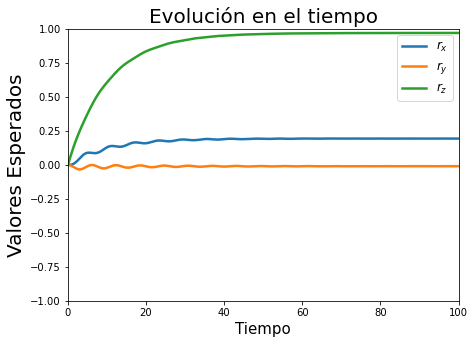

In [9]:
#Graficamos los valores esperados a través del tiempo
fig, axes = plt.subplots(1,1,figsize=(7,5))
axes.plot(result.times,result.expect[0], linewidth=2.5, linestyle="-")
axes.plot(result.times,result.expect[1], linewidth=2.5, linestyle="-")
axes.plot(result.times,result.expect[2], linewidth=2.5, linestyle="-")
axes.legend((r'$r_{x}$', r'$r_{y}$', r'$r_{z}$'),fontsize=12)
axes.set_xlabel('Tiempo',fontsize=15)
axes.set_ylabel('Valores Esperados',fontsize=20)
plt.title("Evolución en el tiempo",fontsize=20)
axes.set_xlim(left=(0), right=(100))
axes.set_ylim(bottom=(-1), top=(1))

ya con los valores esperados tenemos el vector estacionario o el vector de bloch 
$$
r=\sqrt{X^2+Y^2+Z^2}
$$

(-0.0495020860183955, 1.0)

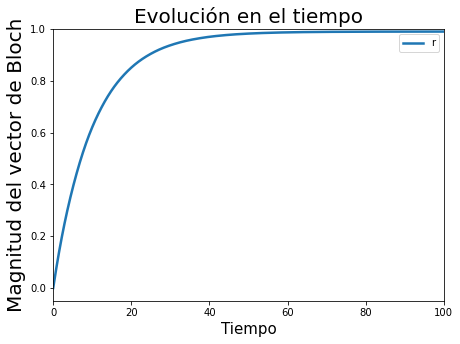

In [10]:
#Graficamos la magnitud de Bloch en el tiempo
fig, axes = plt.subplots(1,1,figsize=(7,5))
axes.plot(result.times,np.sqrt(result.expect[0]**2 + result.expect[1]**2 + result.expect[2]**2), linewidth=2.5, linestyle="-")
axes.legend(("r"))
axes.set_xlabel('Tiempo',fontsize=15)
axes.set_ylabel('Magnitud del vector de Bloch',fontsize=20)
plt.title("Evolución en el tiempo",fontsize=20)
axes.set_xlim(left=(0), right=(100))
axes.set_ylim(top=(1))

La esfera de Bloch nos permite observar ver la dinamica del sistema de dos niveles (linea azul) y su estabilización en la linea roja (estado estacionario) segun los parametros referidos inicialmente. 

C:\Users\HP\anaconda3\lib\site-packages\qutip\bloch.py:752: RuntimeWarning: divide by zero encountered in true_divide
  if any(abs(dist - dist[0]) / dist[0] > 1e-12):
C:\Users\HP\anaconda3\lib\site-packages\qutip\bloch.py:752: RuntimeWarning: invalid value encountered in true_divide
  if any(abs(dist - dist[0]) / dist[0] > 1e-12):


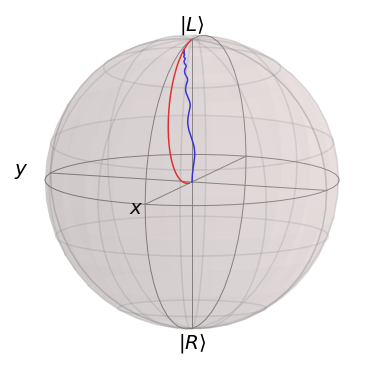

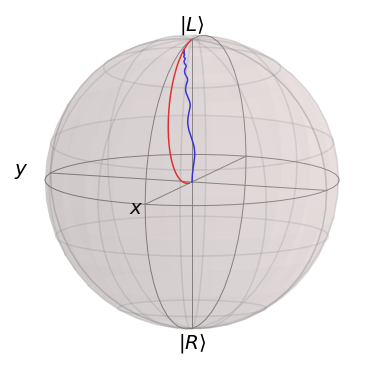

In [11]:
#Obtenemos una visualización en la esfera de Bloch del conjunto de estados estacionarios (rojo) y de la evolución del sistema (azul) 
sphere=Bloch()
sphere.add_points([result.expect[0],result.expect[1],result.expect[2]], meth='l')
sphere.add_points([x,y,z], meth='l')
sphere.zlabel = ['$\\left|L\\right>$','$\\left|R\\right> $']
sphere.zlpos = [1.1,-1.1] 
sphere.view = [70,-10]
sphere.show()

Cuando hablamos de cuantificar la coherencia, tenemos que pensar en una medida, ¿qué tanta coherencia tiene el estado al cual evoluciono el sistema?. La medida de la coherencia más ampliamente utilizada para operaciones libres IOs es la siguiente:

$$
C_{l1}=\sum_{i\neq j}|\rho_{ij}|
$$
es decir, que la medida de la coherencia es la suma de las no diagonales del operador densidad. 

Para poder representar la medida de la coherencia, se necesitan construir los elementos matriciales del operador de estado, sin embargo, como solo tenemos información de los valores esperados de las matrices de Pauli, se puede demostrar que el operador de estado de un sistema de dos niveles puede ser reexpresado en función de estos valores esperados:
$$
\text{$\rho $}=\left(
\begin{array}{cc}
 \rho_{LL} & \rho_{LR} \\
 \rho_{RL} & \rho_{RR} \\
\end{array}
\right)=\frac{1}{2}\left(
\begin{array}{cc}
 1+\sigma z & \sigma x- i\sigma y \\
 \sigma x +i \sigma y & 1-\sigma z \\
\end{array}
\right)
$$


In [12]:
#contrucción de los elementos matriciales del operador densidad a partir de los valores esperados de las matrices de Pauli
rhoLL=0.5*(1+C)
rhoRR=0.5*(1-C)
rhoLR=0.5*(A-1j*B)
rhoRL=0.5*(A+1j*B)

In [13]:
sx=range(len(A))
Coherencia=[]

In [14]:
for k in sx:
    A1=abs(rhoLR[k])
    A2=abs(rhoRL[k])
    Coh=A1+A2
    Coherencia.append(Coh)

(0.0, 1.0)

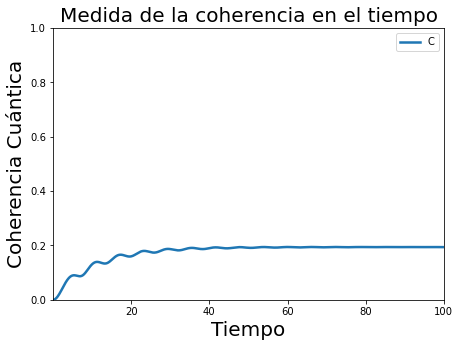

In [15]:
#Graficamos la medida de la coherencia en el tiempo
fig, axes = plt.subplots(1,1,figsize=(7,5))
axes.plot(tlist,Coherencia, linewidth=2.5, linestyle="-")
axes.legend(("CC"))
axes.set_xlabel('Tiempo',fontsize=20)
axes.set_ylabel('Coherencia Cuántica',fontsize=20)
plt.title("Medida de la coherencia en el tiempo",fontsize=20)
axes.set_xlim(left=np.min(x), right=(100))
axes.set_ylim(bottom=(0),top=(1))

También graficaremos la ergotropía a través del tiempo, de la siguiente expresión: $$
W=\frac{1}{2}(r\sqrt{4T_{c}^{2}+\epsilon^{2}}+\epsilon Z+2T_{c} X)
$$

In [16]:
W=[]

In [17]:
for k in sx:
    Wo=0.5*(D[k]*np.sqrt(4*tc**2+delta**2)+delta*C[k]+2*tc*A[k])
    W.append(Wo)
W    

[0.0,
 0.010058414905890104,
 0.020016141959379542,
 0.02987368689381264,
 0.03963156248715322,
 0.049290291449629264,
 0.05885040930113169,
 0.06831246740876852,
 0.07767703548991799,
 0.08694470404935137,
 0.09611608617681013,
 0.10519181940268599,
 0.1141725676035541,
 0.12305902257778495,
 0.13185190419799933,
 0.1405519618294239,
 0.14915997491114819,
 0.15767675299733058,
 0.16610313511529476,
 0.17443999009957373,
 0.18268821619862477,
 0.19084873913112596,
 0.19892251148239562,
 0.20691051152271908,
 0.21481374178126075,
 0.22263322585713427,
 0.23037000765531238,
 0.238025148993679,
 0.2455997265245892,
 0.25309483070786826,
 0.2605115604341716,
 0.2678510244632544,
 0.27511433310020805,
 0.2823026016222969,
 0.2894169411028441,
 0.29645846101667783,
 0.3034282622962155,
 0.31032743687797315,
 0.31715706442042524,
 0.32391820848057307,
 0.33061191665434675,
 0.33723921437842386,
 0.3438011071221116,
 0.35029857373699164,
 0.3567325688409918,
 0.3631040174249361,
 0.36941381630

(0.0, 100.0)

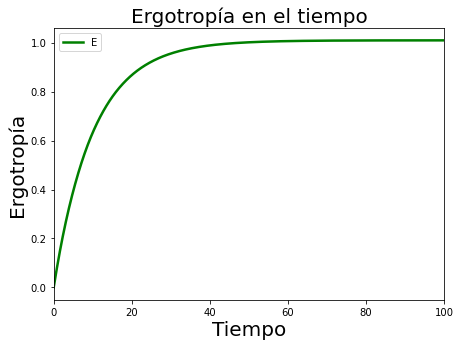

In [18]:
#Graficamos la Erogotropía en el tiempo 
fig, axes = plt.subplots(1,1,figsize=(7,5))
axes.plot(tlist,W, linewidth=2.5, linestyle="-",color="green")
axes.legend(("E"))
axes.set_xlabel('Tiempo',fontsize=20)
axes.set_ylabel('Ergotropía',fontsize=20)
plt.title("Ergotropía en el tiempo",fontsize=20)
axes.set_xlim(left=(0), right=(100))